In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv3D, MaxPooling3D,Conv2D,AveragePooling2D,AveragePooling3D
from keras.layers import Dense, GlobalAveragePooling3D,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler,ReduceLROnPlateau
from keras.optimizers import SGD, RMSprop, Adadelta
from keras.utils import np_utils, generic_utils
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional_recurrent import ConvLSTM2D
import ipyplot

import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
# image specification
img_rows,img_cols=64,64

# Training data

X_tr=[]           # variable to store entire dataset

In [3]:
from tqdm import tqdm

ls_path_4 = os.path.join("./data/Swiping Left")
listing_4 = os.listdir(ls_path_4)

counter = 0

for ls_4 in tqdm(listing_4):
    listing_stop_4 = sorted(os.listdir(os.path.join(ls_path_4,ls_4)))

    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_4 in listing_stop_4:
        if img_depth < 32:
            img = os.path.join(os.path.join(ls_path_4,ls_4),imgs_4)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break

    cv2.imshow(frames[0])

    #ipyplot.plot_images(frames, max_images=32, img_width=80)

    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)
    
    counter = counter + 1
    if counter >= 400:
        break

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr)
print (num_samples)

  0%|          | 0/4162 [00:00<?, ?it/s]


TypeError: imshow() missing required argument 'mat' (pos 2)

In [4]:
from tqdm import tqdm

ls_path_5 = os.path.join("./data/Swiping Right")
listing_5 = os.listdir(ls_path_5)

counter = 0

for ls_5 in tqdm(listing_5):
    listing_stop_5 = sorted(os.listdir(os.path.join(ls_path_5,ls_5)))

    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_5 in listing_stop_5:
        if img_depth < 32:
            img = os.path.join(os.path.join(ls_path_5,ls_5),imgs_5)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)
    
    counter = counter + 1
    if counter >= 400:
        break

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

 10%|▉         | 399/4084 [00:03<00:29, 124.87it/s]

(16, 64, 64, 3)
800


In [5]:
from tqdm import tqdm

counter = 0

ls_path_6 = os.path.join("./data/No gesture")
listing_6 = os.listdir(ls_path_6)

for ls_6 in tqdm(listing_6):
    listing_stop_6 = sorted(os.listdir(os.path.join(ls_path_6,ls_6)))
    #print(ls)
    #img_depth = len(listing_stop_3)
    frames = []
    img_depth=0
    for imgs_6 in listing_stop_6:
        if img_depth < 32:
            img = os.path.join(os.path.join(ls_path_6,ls_6),imgs_6)
            #ret, frame = cap.read()
            frame = cv2.imread(img)
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            frame=cv2.resize(frame,(img_rows,img_cols),interpolation=cv2.INTER_AREA)
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(gray)
            img_depth=img_depth+1
        else:
            break
    input_img = np.array(frames)
    #print (input_img.shape)
    ipt=np.rollaxis(np.rollaxis(input_img,2,0),2,0)
    ipt=np.rollaxis(ipt,2,0)
    #print (ipt.shape)
    X_tr.append(ipt)
    
    counter = counter + 1
    if counter >= 400:
        break

#X_tr_array = np.array(X_tr)   # convert the frames read into array
print (ipt.shape)
num_samples = len(X_tr) 
print (num_samples)

  9%|▉         | 399/4278 [00:03<00:32, 120.15it/s]

(16, 64, 64, 3)
1200


In [6]:
X_tr_array = np.array(X_tr)   # convert the frames read into array

num_samples = len(X_tr_array) 
print (num_samples)

1200


In [7]:
label=np.ones((num_samples,),dtype = int)
label[0:399]= 0
label[400:799] = 1
label[800:1199] = 2

In [8]:
img_depth = 32
train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

train_set = np.zeros((num_samples, img_depth, img_cols,img_rows,3))

for h in range(num_samples):
    train_set[h][:][:][:][:]=X_train[h,:,:,:]
  

patch_size = 32    # img_depth or number of frames used for each video

print(train_set.shape, 'train samples')

X_Train shape: (1200, 16, 64, 64, 3)
(1200, 16, 64, 64, 3) train samples


In [9]:
# CNN Training parameters


nb_classes = 3

In [10]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)

In [11]:
# Pre-processing

train_set = train_set.astype('float32')
print(np.mean(train_set))
train_set -= np.mean(train_set)
print(np.max(train_set))
train_set /=np.max(train_set)

107.53923
147.46077


In [12]:
# Define model
weight_decay = 0.00005
from keras.regularizers import l2

model = Sequential()
model.add(Conv3D(16,(3,3,3),
                        input_shape=(patch_size, img_cols, img_rows, 3),
                        activation='relu'))
model.add(Conv3D(16,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2a_a', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(2,2,2)))


model.add(Conv3D(32,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2b_a', activation = 'relu'))
model.add(Conv3D(32,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2b_b', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(1, 2,2)))


model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2c_a', activation = 'relu'))
model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2c_b', activation = 'relu'))
model.add(Conv3D(64,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2c_c', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(1, 2,2)))


model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2d_a', activation = 'relu'))
model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2d_b', activation = 'relu'))
model.add(Conv3D(128,(3,3,3), strides=(1,1,1),padding='same', 
                    dilation_rate=(1,1,1), kernel_initializer='he_normal',
                    kernel_regularizer=l2(weight_decay), use_bias=False, 
                    name='Conv3D_2d_c', activation = 'relu'))
model.add(MaxPooling3D(pool_size=(1, 2, 2)))






model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm2d_2'))

model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm2d_3'))

model.add(ConvLSTM2D(filters=64, kernel_size=(3,3),
                  strides=(1,1),padding='same',
                      kernel_initializer='he_normal', recurrent_initializer='he_normal',
                      kernel_regularizer=l2(weight_decay), recurrent_regularizer=l2(weight_decay),
                      return_sequences=True, name='gatedclstm2d_4'))


#model.add(MaxPooling3D(pool_size=(nb_pool[0], nb_pool[0], nb_pool[0])))
#model.add(Flatten())
model.add(GlobalAveragePooling3D())
model.add(Dropout(0.5))
model.add(Dense(nb_classes,kernel_initializer='normal'))

model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 14, 62, 62, 16)    1312      
_________________________________________________________________
Conv3D_2a_a (Conv3D)         (None, 14, 62, 62, 16)    6912      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 7, 31, 31, 16)     0         
_________________________________________________________________
Conv3D_2b_a (Conv3D)         (None, 7, 31, 31, 32)     13824     
_________________________________________________________________
Conv3D_2b_b (Conv3D)         (None, 7, 31, 31, 32)     27648     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 7, 15, 15, 32)     0         
_________________________________________________________________
Conv3D_2c_a (Conv3D)         (None, 7, 15, 15, 64)     5

In [14]:
import os
save_dir = os.path.join(os.getcwd(),'saved_model')
print(os.getcwd())
model_name = "3DCNN+3LSTM_64_6_jester"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor = 'val_acc', 
                            save_best_only=True, verbose=1)
#earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=50, verbose =1)

/home/shysa/PycharmProjects/test


In [15]:
sgd = SGD(lr=0.005,  momentum=0.9, nesterov=False)
rms = RMSprop(decay=1e-6)
ada = Adadelta(lr=0.1,decay=1e-6)
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              #optimizer=ada,
              #optimizer = Adam(lr=0.0001),
              metrics=['accuracy'])

In [16]:
X_train_new, X_val_new, y_train_new,y_val_new = train_test_split(train_set, Y_train, test_size=0.2, random_state=20)

In [ ]:
batch_size = 32
nb_epoch = 300
#steps_per_epoch=int((len(X_val_new)*1.5)/batch_size)
lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.05, 
                               cooldown=0, patience=10, min_lr=0.005/(2^4),verbose=1)
hist = model.fit(
    X_train_new,
    y_train_new,
    validation_data=(X_val_new,y_val_new),
    batch_size=batch_size,
    epochs = nb_epoch,
    shuffle=True,
    callbacks=[checkpoint,lr_reducer]
    )

Epoch 1/300
30/30 [==============================] - 29s 663ms/step - loss: 1.3185 - acc: 0.2827 - val_loss: 1.3179 - val_acc: 0.3458

Epoch 00001: val_acc improved from -inf to 0.34583, saving model to /home/shysa/PycharmProjects/test/saved_model/3DCNN+3LSTM_64_6_jester
INFO:tensorflow:Assets written to: /home/shysa/PycharmProjects/test/saved_model/3DCNN+3LSTM_64_6_jester/assets
Epoch 2/300
30/30 [==============================] - 18s 608ms/step - loss: 1.3179 - acc: 0.3336 - val_loss: 1.3181 - val_acc: 0.3250

Epoch 00002: val_acc did not improve from 0.34583
Epoch 3/300
30/30 [==============================] - 18s 609ms/step - loss: 1.3178 - acc: 0.3209 - val_loss: 1.3178 - val_acc: 0.2917

Epoch 00003: val_acc did not improve from 0.34583
Epoch 4/300
30/30 [==============================] - 18s 609ms/step - loss: 1.3178 - acc: 0.3134 - val_loss: 1.3180 - val_acc: 0.3250

Epoch 00004: val_acc did not improve from 0.34583
Epoch 5/300
30/30 [==============================] - 18s 610ms

INFO:tensorflow:Assets written to: /home/shysa/PycharmProjects/test/saved_model/3DCNN+3LSTM_64_6_jester/assets
Epoch 35/300
30/30 [==============================] - 18s 612ms/step - loss: 0.9395 - acc: 0.7873 - val_loss: 0.8856 - val_acc: 0.7792

Epoch 00035: val_acc did not improve from 0.85000
Epoch 36/300
30/30 [==============================] - 18s 612ms/step - loss: 0.8440 - acc: 0.7996 - val_loss: 0.7545 - val_acc: 0.8333

Epoch 00036: val_acc did not improve from 0.85000
Epoch 37/300
30/30 [==============================] - 19s 620ms/step - loss: 0.7273 - acc: 0.8420 - val_loss: 0.5783 - val_acc: 0.9125

Epoch 00037: val_acc improved from 0.85000 to 0.91250, saving model to /home/shysa/PycharmProjects/test/saved_model/3DCNN+3LSTM_64_6_jester
INFO:tensorflow:Assets written to: /home/shysa/PycharmProjects/test/saved_model/3DCNN+3LSTM_64_6_jester/assets
Epoch 38/300
30/30 [==============================] - 18s 613ms/step - loss: 0.6254 - acc: 0.8812 - val_loss: 0.5442 - val_acc: 0.

INFO:tensorflow:Assets written to: /home/shysa/PycharmProjects/test/saved_model/3DCNN+3LSTM_64_6_jester/assets
Epoch 71/300
30/30 [==============================] - 18s 611ms/step - loss: 0.3496 - acc: 0.9712 - val_loss: 0.4032 - val_acc: 0.9625

Epoch 00071: val_acc did not improve from 0.97083

Epoch 00071: ReduceLROnPlateau reducing learning rate to 0.0008333333333333334.
Epoch 72/300
30/30 [==============================] - 18s 612ms/step - loss: 0.3332 - acc: 0.9735 - val_loss: 0.4104 - val_acc: 0.9542

Epoch 00072: val_acc did not improve from 0.97083
Epoch 73/300
30/30 [==============================] - 18s 612ms/step - loss: 0.3323 - acc: 0.9699 - val_loss: 0.3866 - val_acc: 0.9667

Epoch 00073: val_acc did not improve from 0.97083
Epoch 74/300
30/30 [==============================] - 18s 613ms/step - loss: 0.3195 - acc: 0.9753 - val_loss: 0.3886 - val_acc: 0.9667

Epoch 00074: val_acc did not improve from 0.97083
Epoch 75/300
30/30 [==============================] - 18s 612ms/


Epoch 00112: val_acc did not improve from 0.97083
Epoch 113/300
30/30 [==============================] - 18s 614ms/step - loss: 0.2912 - acc: 0.9887 - val_loss: 0.4029 - val_acc: 0.9667

Epoch 00113: val_acc did not improve from 0.97083

Epoch 00113: ReduceLROnPlateau reducing learning rate to 0.0008333333333333334.
Epoch 114/300
30/30 [==============================] - 18s 612ms/step - loss: 0.2698 - acc: 0.9917 - val_loss: 0.4034 - val_acc: 0.9625

Epoch 00114: val_acc did not improve from 0.97083
Epoch 115/300
30/30 [==============================] - 18s 612ms/step - loss: 0.2829 - acc: 0.9886 - val_loss: 0.4036 - val_acc: 0.9625

Epoch 00115: val_acc did not improve from 0.97083
Epoch 116/300
30/30 [==============================] - 18s 612ms/step - loss: 0.3031 - acc: 0.9826 - val_loss: 0.4044 - val_acc: 0.9625

Epoch 00116: val_acc did not improve from 0.97083
Epoch 117/300
30/30 [==============================] - 18s 611ms/step - loss: 0.3139 - acc: 0.9780 - val_loss: 0.3983 - 

30/30 [==============================] - 19s 622ms/step - loss: 0.2366 - acc: 0.9972 - val_loss: 0.4487 - val_acc: 0.9583

Epoch 00196: val_acc did not improve from 0.97083
Epoch 197/300
30/30 [==============================] - 18s 609ms/step - loss: 0.2291 - acc: 0.9991 - val_loss: 0.4464 - val_acc: 0.9583

Epoch 00197: val_acc did not improve from 0.97083
Epoch 198/300
30/30 [==============================] - 18s 611ms/step - loss: 0.2326 - acc: 0.9979 - val_loss: 0.4473 - val_acc: 0.9583

Epoch 00198: val_acc did not improve from 0.97083
Epoch 199/300
30/30 [==============================] - 18s 611ms/step - loss: 0.2291 - acc: 0.9988 - val_loss: 0.4471 - val_acc: 0.9583

Epoch 00199: val_acc did not improve from 0.97083
Epoch 200/300
30/30 [==============================] - 18s 611ms/step - loss: 0.2348 - acc: 0.9982 - val_loss: 0.4525 - val_acc: 0.9583

Epoch 00200: val_acc did not improve from 0.97083
Epoch 201/300
30/30 [==============================] - 18s 611ms/step - loss: 0

30/30 [==============================] - 19s 640ms/step - loss: 0.2191 - acc: 0.9998 - val_loss: 0.4760 - val_acc: 0.9583

Epoch 00280: val_acc did not improve from 0.97083
Epoch 281/300
30/30 [==============================] - 18s 611ms/step - loss: 0.2320 - acc: 0.9969 - val_loss: 0.4764 - val_acc: 0.9583

Epoch 00281: val_acc did not improve from 0.97083
Epoch 282/300
30/30 [==============================] - 18s 613ms/step - loss: 0.2217 - acc: 0.9996 - val_loss: 0.4770 - val_acc: 0.9583

Epoch 00282: val_acc did not improve from 0.97083
Epoch 283/300
30/30 [==============================] - 18s 607ms/step - loss: 0.2199 - acc: 0.9998 - val_loss: 0.4769 - val_acc: 0.9583

Epoch 00283: val_acc did not improve from 0.97083

Epoch 00283: ReduceLROnPlateau reducing learning rate to 0.0008333333333333334.
Epoch 284/300
30/30 [==============================] - 18s 616ms/step - loss: 0.2268 - acc: 0.9988 - val_loss: 0.4769 - val_acc: 0.9583

Epoch 00284: val_acc did not improve from 0.9708

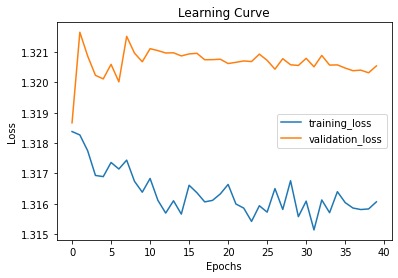

In [18]:
training_loss = hist.history['loss']
val_loss = hist.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()


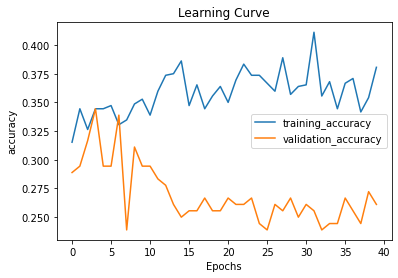

In [19]:
training_acc = hist.history['acc']
val_acc = hist.history['val_acc']

plt.plot(training_acc, label="training_accuracy")
plt.plot(val_acc, label="validation_accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()